In [45]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import lasio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [67]:
las1 = lasio.read(r'C:\Users\Porsche\Downloads\EarthBank_Data_2021-07-27 16_32\30_2-1.las')

In [68]:
df3021 = las1.df()

In [69]:
df_idx1 = df3021.rename_axis('Depth').reset_index()

In [70]:
df_idx1.head()

,Depth,CALI,DEN_ED,DT_ED,GR_ED,NPHI_ED,RDEP_ED,SP,VSH33
0,124.2548,20.75,NaN,56.7813,9.8594,NaN,NaN,NaN,0.035796
1,124.4072,20.75,NaN,56.3750,9.0156,NaN,2000.0,-245.375,0.031737
2,124.5596,20.75,NaN,56.7813,9.5703,NaN,2000.0,-252.875,0.034400
3,124.7120,20.75,NaN,56.5938,9.8984,NaN,2000.0,-230.250,0.035984
4,124.8644,20.75,NaN,56.7813,8.1406,NaN,2000.0,-248.375,0.027575


In [71]:
df_idx1['DT_[us/m]'] = (df_idx1.DT_ED * 3.28084)

In [72]:
df_idx1.head()

,Depth,CALI,DEN_ED,DT_ED,GR_ED,NPHI_ED,RDEP_ED,SP,VSH33,DT_[us/m]
0,124.2548,20.75,NaN,56.7813,9.8594,NaN,NaN,NaN,0.035796,186.290359
1,124.4072,20.75,NaN,56.3750,9.0156,NaN,2000.0,-245.375,0.031737,184.957355
2,124.5596,20.75,NaN,56.7813,9.5703,NaN,2000.0,-252.875,0.034400,186.290359
3,124.7120,20.75,NaN,56.5938,9.8984,NaN,2000.0,-230.250,0.035984,185.675201
4,124.8644,20.75,NaN,56.7813,8.1406,NaN,2000.0,-248.375,0.027575,186.290359


In [73]:
df_idx1.loc[-1] = [0,0,0,0,0,0,0,0,0,0,]
df_idx1.index = df_idx1.index +1
df_idx1 = df_idx1.sort_index()

In [53]:
df_idx1.head()

,Depth,CALI,DEN_ED,DT_ED,GR_ED,NPHI_ED,RDEP_ED,SP,VSH33,DT [us/m]
0,0.0000,0.00,0.0,0.0000,0.0000,0.0,0.0,0.000,0.000000,0.000000
1,124.2548,20.75,NaN,56.7813,9.8594,NaN,NaN,NaN,0.035796,186.290359
2,124.4072,20.75,NaN,56.3750,9.0156,NaN,2000.0,-245.375,0.031737,184.957355
3,124.5596,20.75,NaN,56.7813,9.5703,NaN,2000.0,-252.875,0.034400,186.290359
4,124.7120,20.75,NaN,56.5938,9.8984,NaN,2000.0,-230.250,0.035984,185.675201


In [179]:
Phi_o = .75
lam = 1500
z = (df_idx1.Depth)
Vw = 1.5 #km s^-1
Vsg = 5.5 # +- 0.5 kms^-1
phi = Phi_o * np.exp(-z/lam)
phi


t = ((z/Vsg) + (Phi_o * lam)*((1/ Vw) - (1/ Vsg))*(1 - np.exp(-z/lam)))*2
#t -  time in [ms]

t

0           0.000000
1         131.909084
2         132.066522
3         132.223950
4         132.381367
            ...     
27095    2573.573885
27096    2573.635807
27097    2573.697729
27098    2573.759650
27099    2573.821570
Name: Depth, Length: 26915, dtype: float64

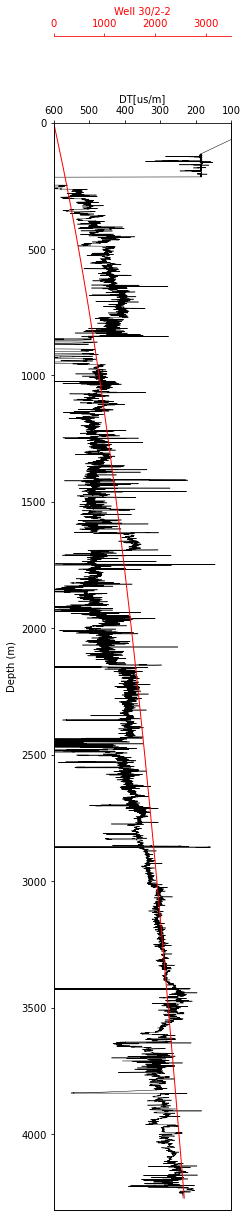

In [180]:
fig = plt.subplots(figsize=(7,20))

ax1 = plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=1)
ax2 = ax1.twiny()

ax1.plot('DT_[us/m]', 'Depth', data=df_idx1, color='black', lw=0.5)
ax1.set_xlim(600,100)
ax1.set_xlabel('DT[us/m]')
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")

ax2.plot(t, 'Depth', data=df_idx1, color='red', lw=1)
ax2.set_xlim(0,3500)
ax2.set_xlabel('Well 30/2-2')

ax2.xaxis.label.set_color("red")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")




for ax in [ax1, ax2]:
    ax.set_ylim(4300, 0)
    ax.set_ylabel ("Depth (m)")
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    #labels
    #ax.axhline(y =3935, c= 'blue', lw =1)  #Tarbert
    #ax.axhline(y =4098, c= 'blue', lw =1)  #Oseberg